In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from textblob import TextBlob
from nltk import sent_tokenize
import requests

driver = webdriver.Edge() 

In [146]:
name=[]
rating=[]
review=[]

url ="""https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART&page=1"""

for i in range(1,30):
    new_url = url + "&page="+str(i)
    r = requests.get(new_url)
    soup = BeautifulSoup(r.text,'html.parser')
    Names = soup.find_all("p" , {"class":"_2NsDsF AwS1CA"})
    for i in Names:
        name.append(i.text)
    name
    
    Ratings = soup.find_all("div" ,{"class":"XQDdHH Ga3i8K"})
    for i in Ratings:
        rating.append(i.text)
    rating
    
    Reviews = soup.find_all("div",{"class":"ZmyHeo"})
    for i in Reviews:
        review.append(i.text)
    review    
print(len(name) ,len(rating), len(review))


120 120 120


In [148]:
#dataframe 
df = pd.DataFrame({"Customer Names" : name ,"Rating":rating,"Review":review})
df

,Customer Names,Rating,Review
0,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,5,High quality camera😍READ MORE
3,Saurabh Gothwad,5,Simply premium.READ MORE
4,Mousam Guha Roy,4,Very niceREAD MORE
...,...,...,...
115,Ritik Tomar,5,Nice productREAD MORE
116,Flipkart Customer,4,just love it ...READ MORE
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall..."
118,Ranjith kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ..."


In [150]:
#get title
df ["Customer Names"] = df["Customer Names"].str.title()
df

,Customer Names,Rating,Review
0,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,5,High quality camera😍READ MORE
3,Saurabh Gothwad,5,Simply premium.READ MORE
4,Mousam Guha Roy,4,Very niceREAD MORE
...,...,...,...
115,Ritik Tomar,5,Nice productREAD MORE
116,Flipkart Customer,4,just love it ...READ MORE
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall..."
118,Ranjith Kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ..."


In [152]:
#remove readmore in review

df["Review"] = df["Review"].str.replace("READ MORE", "")
df

,Customer Names,Rating,Review
0,Rishabh Jha,5,Awesome 🔥🔥☺️
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,5,High quality camera😍
3,Saurabh Gothwad,5,Simply premium.
4,Mousam Guha Roy,4,Very nice
...,...,...,...
115,Ritik Tomar,5,Nice product
116,Flipkart Customer,4,just love it ...
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall..."
118,Ranjith Kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ..."


In [154]:
#create review1 extra
df["Review_1"] = df["Review"].apply(sent_tokenize)
df

,Customer Names,Rating,Review,Review_1
0,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️]
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...
2,Ajin V,5,High quality camera😍,[High quality camera😍]
3,Saurabh Gothwad,5,Simply premium.,[Simply premium.]
4,Mousam Guha Roy,4,Very nice,[Very nice]
...,...,...,...,...
115,Ritik Tomar,5,Nice product,[Nice product]
116,Flipkart Customer,4,just love it ...,[just love it ...]
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall...","[Awesome 🫰 As a first time ios user, I literal..."
118,Ranjith Kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ...","[Bought 256gb green variant 😍,new to iosIOS is..."


In [156]:
#polarity
from textblob import blob
def get_polarity(sentences):
    return[TextBlob(sentence).sentiment.polarity for sentence in sentences]
df['Polarity'] = df['Review_1'].apply(get_polarity)
df

,Customer Names,Rating,Review,Review_1,Polarity
0,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️],[1.0]
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666]
2,Ajin V,5,High quality camera😍,[High quality camera😍],[0.16]
3,Saurabh Gothwad,5,Simply premium.,[Simply premium.],[0.0]
4,Mousam Guha Roy,4,Very nice,[Very nice],[0.78]
...,...,...,...,...,...
115,Ritik Tomar,5,Nice product,[Nice product],[0.6]
116,Flipkart Customer,4,just love it ...,[just love it ...],[0.5]
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall...","[Awesome 🫰 As a first time ios user, I literal...","[0.45, 0.084, 0.0, 0.0, 0.0]"
118,Ranjith Kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ...","[Bought 256gb green variant 😍,new to iosIOS is...",[-0.125]


In [214]:
# mean of the polarity.
from statistics import mean
from textblob import blob
def get_polarity(sentences):
    return[TextBlob(sentence).sentiment.polarity for sentence in sentences]
df['Polarity'] = df['Review_1'].apply(get_polarity)

df.head(15)

,Customer Names,Rating,Review,Review_1,Polarity,Average_Polarity,Sentiment,Review_length
0,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️],[1.0],1.000000,Extremly positive,2
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,positive,10
2,Ajin V,5,High quality camera😍,[High quality camera😍],[0.16],0.160000,positive,3
3,Saurabh Gothwad,5,Simply premium.,[Simply premium.],[0.0],0.000000,neutral,2
4,Mousam Guha Roy,4,Very nice,[Very nice],[0.78],0.780000,Extremly positive,2
5,Flipkart Customer,5,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",0.733333,positive,15
6,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000,positive,17
7,Prithivi Boruah,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,positive,6
8,Rahul Shedge,5,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,[0.0],0.000000,neutral,7
9,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000,positive,7


In [216]:
#average_polarity
from statistics import mean
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)

df.head(15)

,Customer Names,Rating,Review,Review_1,Polarity,Average_Polarity,Sentiment,Review_length
0,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️],[1.0],1.000000,Extremly positive,2
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,positive,10
2,Ajin V,5,High quality camera😍,[High quality camera😍],[0.16],0.160000,positive,3
3,Saurabh Gothwad,5,Simply premium.,[Simply premium.],[0.0],0.000000,neutral,2
4,Mousam Guha Roy,4,Very nice,[Very nice],[0.78],0.780000,Extremly positive,2
5,Flipkart Customer,5,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",0.733333,positive,15
6,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000,positive,17
7,Prithivi Boruah,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,positive,6
8,Rahul Shedge,5,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,[0.0],0.000000,neutral,7
9,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000,positive,7


In [162]:
#sentiment of each review to classify them as either positive or negative.

#Extremly Positive , Positive ,Neutral ,Negtive , Extremaly Negative.

def sentiment(pol):
    if pol >= 0.738:
        return "Extremly positive"
    elif pol > 0:
        return "positive"
    elif pol == 0:
        return "neutral"
    elif pol <= -0.738:
        return "negative"
    else :
        return "extremly negative"

df["Sentiment"] = df["Average_Polarity"].apply(sentiment)
df

,Customer Names,Rating,Review,Review_1,Polarity,Average_Polarity,Sentiment
0,Rishabh Jha,5,Awesome 🔥🔥☺️,[Awesome 🔥🔥☺️],[1.0],1.000000,Extremly positive
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,positive
2,Ajin V,5,High quality camera😍,[High quality camera😍],[0.16],0.160000,positive
3,Saurabh Gothwad,5,Simply premium.,[Simply premium.],[0.0],0.000000,neutral
4,Mousam Guha Roy,4,Very nice,[Very nice],[0.78],0.780000,Extremly positive
...,...,...,...,...,...,...,...
115,Ritik Tomar,5,Nice product,[Nice product],[0.6],0.600000,positive
116,Flipkart Customer,4,just love it ...,[just love it ...],[0.5],0.500000,positive
117,John Fanai,5,"Awesome 🫰 As a first time ios user, I literall...","[Awesome 🫰 As a first time ios user, I literal...","[0.45, 0.084, 0.0, 0.0, 0.0]",0.106800,positive
118,Ranjith Kumar,5,"Bought 256gb green variant 😍,new to iosIOS is ...","[Bought 256gb green variant 😍,new to iosIOS is...",[-0.125],-0.125000,extremly negative


In [164]:
#average_mean
# The reviews of IPhone 15(128gb) is positive.
df['Average_Polarity'].mean()

0.48783607734086903

In [166]:
#Over all Average polarity Score of the entire data set.
polarity_score = df['Average_Polarity'].mean()
print('Average Polarity Score:{Polarity Score}')

if polarity_score >= 0.738:
    print("The Average Polarity Score is Extremly positive")
elif polarity_score > 0:
    print("The Average Polarity Score is positive")
elif polarity_score== 0:
    print("The Average Polarity Score is neutral")
elif polarity_score<= -0.738:
    print("The Average Polarity Score is negative")
else :
    print("The Average Polarity Score is extremly negative") 

Average Polarity Score:{Polarity Score}
The Average Polarity Score is positive


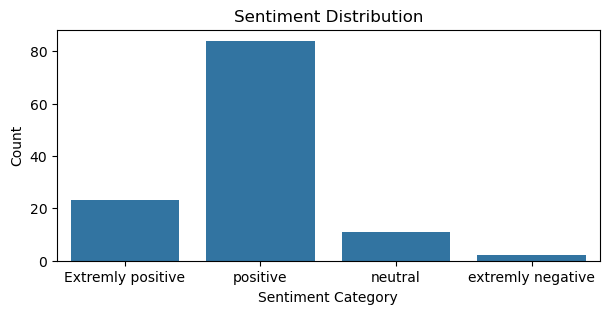

In [168]:
# Plot the sentiment distribution
plt.figure(figsize=(7, 3))
sns.countplot(x= df["Sentiment"])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

#Insight: This will give you a sense of whether reviews skew more positive or negative.

In [200]:
average_rating = df['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 4.87


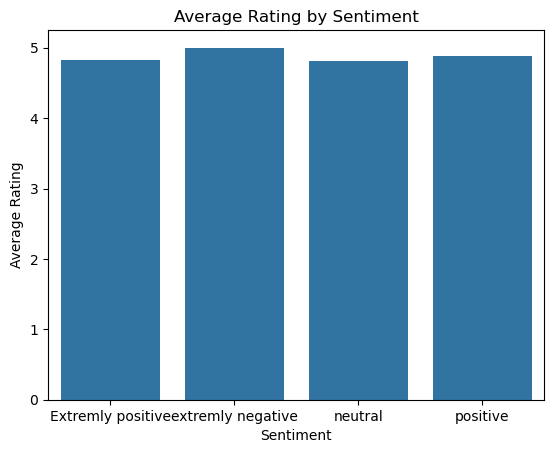

In [204]:
#Average Rating vs Sentiment
avg_rating = df.groupby('Sentiment')['Rating'].mean().reset_index()

sns.barplot(data=avg_rating, x='Sentiment', y='Rating')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()
#Insight: If positive reviews correspond to higher star ratings, it’ll support the sentiment labeling accuracy.

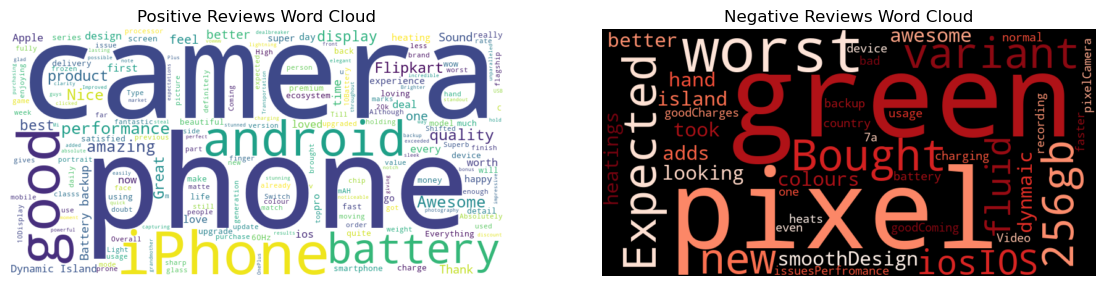

In [210]:
#Review Length Analysis
from wordcloud import WordCloud

positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
extremly_negative_text = ' '.join(df[df['Sentiment'] == 'extremly negative']['Review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(extremly_negative_text)

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()
#nsight: Pinpoint what users love or complain about most frequently.

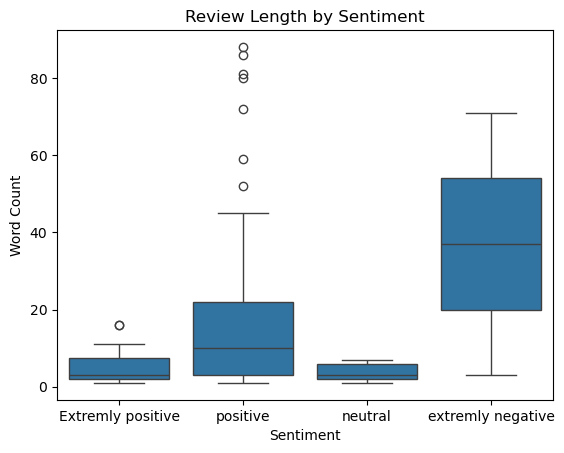

In [212]:
#Review Length Analysis
df['Review_length'] = df['Review'].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x='Sentiment', y='Review_length')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()
